Mapping between pitch values and note names for reference


notes ={


    16.35: 'C0', 17.32: 'C#0/Db0', 18.35: 'D0', 19.45: 'D#0/Eb0', 20.60: 'E0', 21.83: 'F0', 23.12: 'F#0/Gb0',

    24.50: 'G0', 25.96: 'G#0/Ab0', 27.50: 'A0', 29.14: 'A#0/Bb0', 30.87: 'B0', 32.70: 'C1', 34.65: 'C#1/Db1',

    36.71: 'D1', 38.89: 'D#1/Eb1', 41.20: 'E1', 43.65: 'F1', 46.25: 'F#1/Gb1', 49.00: 'G1', 51.91: 'G#1/Ab1',

    55.00: 'A1', 58.27: 'A#1/Bb1', 61.74: 'B1', 65.41: 'C2', 69.30: 'C#2/Db2', 73.42: 'D2', 77.78: 'D#2/Eb2',

    82.41: 'E2', 87.31: 'F2', 92.50: 'F#2/Gb2', 98.00: 'G2', 103.83: 'G#2/Ab2', 110.00: 'A2', 116.54: 'A#2/Bb2',

    123.47: 'B2', 130.81: 'C3', 138.59: 'C#3/Db3', 146.83: 'D3', 155.56: 'D#3/Eb3', 164.81: 'E3', 174.61: 'F3',

    185.00: 'F#3/Gb3', 196.00: 'G3', 207.65: 'G#3/Ab3', 220.00: 'A3', 233.08: 'A#3/Bb3', 246.94: 'B3', 261.63: 'C4',

    277.18: 'C#4/Db4', 293.66: 'D4', 311.13: 'D#4/Eb4', 329.63: 'E4', 349.23: 'F4', 369.99: 'F#4/Gb4', 392.00: 'G4',

    415.30: 'G#4/Ab4', 440.00: 'A4', 466.16: 'A#4/Bb4', 493.88: 'B4', 523.25: 'C5', 554.37: 'C#5/Db5', 587.33: 'D5',

    622.25: 'D#5/Eb5', 659.25: 'E5', 698.46: 'F5', 739.99: 'F#5/Gb5', 783.99: 'G5', 830.61: 'G#5/'
    
    }

[Crepe Documentation
](https://github.com/marl/crepe)

Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install soundfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Remove silences from start and end of the song

In [ ]:
import librosa
import numpy as np
import soundfile as sf


audio_file, sr = librosa.load('/content/drive/MyDrive/TY-SEM - I/EDI/Final_Notebooks/Test/blankspacemid.wav')

# Set the threshold for silence detection
threshold_energy = np.mean(np.abs(audio_file)) * 1.5  # Adjust multiplier as needed

# Find the indices where the audio exceeds the threshold energy
non_silent_indices = np.where(np.abs(audio_file) > threshold_energy)[0]

# Detect the start and end indices of the music
start_index = non_silent_indices[0]
end_index = non_silent_indices[-1]


music_segment = audio_file[start_index:end_index]


output_path = '/content/drive/MyDrive/TY-SEM - I/EDI/Audio-Samples/trimmed_blankspacemid.wav'
sf.write(output_path, music_segment, sr)


from IPython.display import Audio

audio_file, sr = librosa.load('/content/drive/MyDrive/TY-SEM - I/EDI/Audio-Samples/trimmed_blankspacemid.wav')

Audio(audio_file, rate=sr)

<ipython-input-3-7ba67e0ecf9a>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_file, sr = librosa.load('/content/drive/MyDrive/TY-SEM - I/EDI/Final_Notebooks/Test/blankspacemid.wav')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: ignored

Visualization of the audio

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


audio_file, sr = librosa.load('/content/drive/MyDrive/TY-SEM - I/EDI/Audio-Samples/trimmed_blankspacemid.wav')


duration = len(audio_file) / sr
print(f'Duration is: {duration}')

#  waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio_file, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

#  spectrogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_file)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
print(len(audio_file))

218665


Plotting average amplitude vs windows

 Discrete Windows used

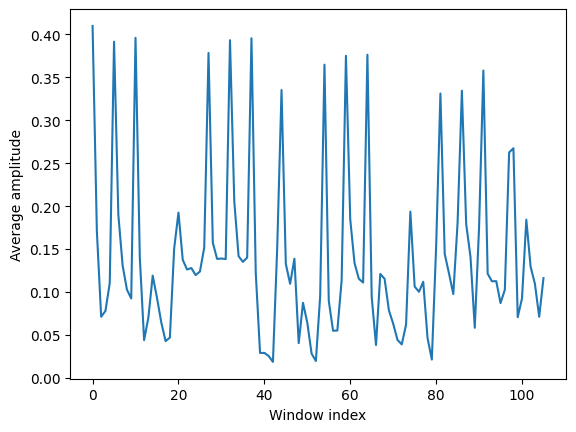

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


win_size = 2048


audio_file, sr = librosa.load('/content/drive/MyDrive/TY-SEM - I/EDI/Audio-Samples/trimmed_blankspacemid.wav')


num_Windows = len(audio_file) // win_size


avg_amplitudes = []

#  average amplitude for each window
for i in range(num_Windows):
    start = i * win_size
    end = start + win_size
    window = audio_file[start:end]
    avg_amplitude = np.mean(np.abs(window))
    avg_amplitudes.append(avg_amplitude)


plt.plot(avg_amplitudes)
plt.xlabel('Window index')
plt.ylabel('Average amplitude')
plt.show()


In [ ]:
print(num_Windows)

106


Plotting logarithm of average Amplitude vs Window index for better visualization

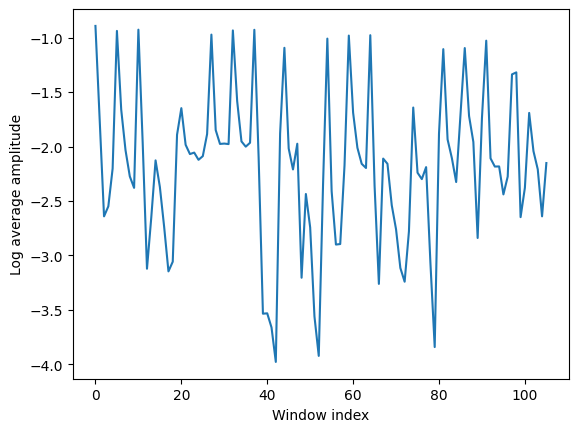

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


win_size = 2048


audio_file, sr = librosa.load('/content/drive/MyDrive/TY-SEM - I/EDI/Audio-Samples/trimmed_blankspacemid.wav')


num_Windows = len(audio_file) // win_size


log_avg_amplitudes = []


for i in range(num_Windows):
    start = i * win_size
    end = start + win_size
    window = audio_file[start:end]
    avg_amplitude = np.mean(np.abs(window))
    log_avg_amplitude = np.log(avg_amplitude)
    log_avg_amplitudes.append(log_avg_amplitude)

# Plot the logarithm of average amplitudes against the window index
plt.plot(log_avg_amplitudes)
plt.xlabel('Window index')
plt.ylabel('Log average amplitude')
plt.show()


In [ ]:
pip install crepe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.2/217.2 kB 29.2 MB/s eta 0:00:00
  Created wheel for crepe: filename=crepe-0.0.13-py3-none-any.whl size=134848694 sha256=03beaf785433d06c11a2ecc9985122b49811e342b3122b13d9cdd8942418affc
  Stored in directory: /root/.cache/pip/wheels/8d/26/87/587cefeb29cc18227d323809c16de9ca64495f527418d5eb06
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320711 sha256=890845d33e8f2ad03a7178084d42e62889a5d6da77e262d5dacd7e7a37220e9d
  Stored in directory: /root/.cache/pip/wheels/e5/a0/79/29e61754e5b3941ad4c7d01bf5bea99768e64e4bdd3180f32b
Successfully built crepe resampy


In [ ]:
import crepe
from scipy.io import wavfile
from os.path import expanduser
import numpy

Using Crepe for Pitch Detection

In [ ]:
sr, audio = wavfile.read(expanduser('/content/drive/MyDrive/TY-SEM - I/EDI/Audio-Samples/trimmed_blankspacemid.wav'))
time, frequency, confidence, activation = crepe.predict(audio, sr, viterbi=True)
a = numpy.column_stack((time, frequency, confidence))
numpy.savetxt(expanduser('/content/drive/MyDrive/TY-SEM - I/EDI/Audio-Samples/trimmed_blankspacemid.csv'), a,
              ['%.3f', '%.3f', '%.6f'],
              delimiter=',')

31/31 [==============================] - 50s 2s/step


View first few rows of the CSV

In [ ]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/TY-SEM - I/EDI/Audio-Samples/trimmed_blankspacemid.csv')
num_rows = df.shape[0]

print(df.head())
print("Number of rows:", num_rows)

   0.000  160.842  0.056129
0   0.01  175.893  0.040180
1   0.02  176.373  0.208959
2   0.03  196.940  0.257168
3   0.04  219.688  0.360730
4   0.05  247.744  0.441153
Number of rows: 991


Calculate Average Pitch value for every Window and Plot it

Window 0: Average Pitch: 218.89
Window 1: Average Pitch: 261.32
Window 2: Average Pitch: 228.34
Window 3: Average Pitch: 229.27
Window 4: Average Pitch: 290.71
Window 5: Average Pitch: 327.24
Window 6: Average Pitch: 328.30
Window 7: Average Pitch: 343.96
Window 8: Average Pitch: 347.23
Window 9: Average Pitch: 349.71
Window 10: Average Pitch: 335.17
Window 11: Average Pitch: 380.13
Window 12: Average Pitch: 389.47
Window 13: Average Pitch: 335.84
Window 14: Average Pitch: 265.71
Window 15: Average Pitch: 264.26
Window 16: Average Pitch: 382.58
Window 17: Average Pitch: 386.87
Window 18: Average Pitch: 356.37
Window 19: Average Pitch: 385.45
Window 20: Average Pitch: 406.01
Window 21: Average Pitch: 429.33
Window 22: Average Pitch: 441.47
Window 23: Average Pitch: 440.80
Window 24: Average Pitch: 449.72
Window 25: Average Pitch: 452.34
Window 26: Average Pitch: 438.43
Window 27: Average Pitch: 439.60
Window 28: Average Pitch: 414.05
Window 29: Average Pitch: 392.14
Window 30: Average P

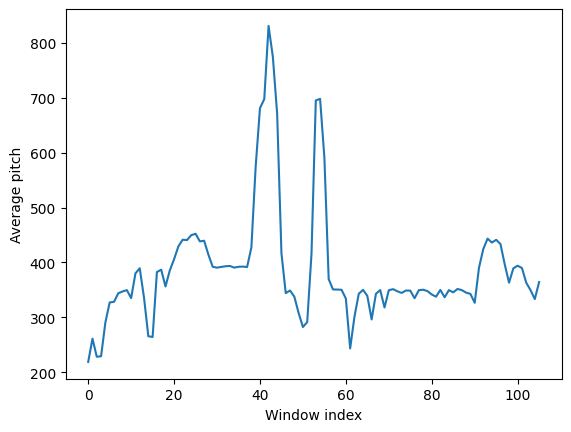

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt


pitch_values = []
with open('/content/drive/MyDrive/TY-SEM - I/EDI/Audio-Samples/trimmed_blankspacemid.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        pitch_values.append(float(row[1]))


#win_size = num_rows // num_Windows
win_size =991//106


#num_windows = num_Windows
num_windows = 106


avg_pitch_values = []

#average pitch value for each window
for i in range(num_windows):
    #print(i)
    start = i * win_size
    end = start + win_size
    window = pitch_values[start:end]
    #print(window)
    avg_pitch = np.mean(window)
    #print(avg_pitch)
    avg_pitch_values.append(avg_pitch)

    print("Window {}: Average Pitch: {:.2f}".format(i, avg_pitch))


plt.plot(avg_pitch_values)
plt.xlabel('Window index')
plt.ylabel('Average pitch')
plt.show()


In [ ]:
print(len(avg_pitch_values))

106


In [ ]:
print(avg_pitch_values)

[218.8928888888889, 261.31711111111116, 228.33733333333333, 229.273, 290.70877777777775, 327.24233333333336, 328.3014444444444, 343.9574444444445, 347.23322222222225, 349.71211111111114, 335.1667777777778, 380.12677777777776, 389.4687777777778, 335.83966666666663, 265.7106666666667, 264.26222222222225, 382.5833333333333, 386.8703333333333, 356.36955555555556, 385.45233333333334, 406.0101111111111, 429.33366666666666, 441.4707777777778, 440.80244444444446, 449.71633333333335, 452.34344444444446, 438.42844444444444, 439.598, 414.0542222222222, 392.13677777777775, 390.5655555555556, 391.9278888888889, 393.13444444444445, 393.70744444444443, 390.6101111111111, 392.15077777777776, 392.5172222222222, 391.66844444444445, 427.44622222222216, 575.0711111111111, 681.0198888888889, 697.6142222222222, 830.8561111111111, 774.5924444444445, 670.6863333333333, 416.6906666666667, 344.1517777777778, 348.9528888888889, 337.7167777777778, 308.00177777777776, 282.42855555555553, 291.41888888888894, 416.12

In [ ]:
print(avg_amplitudes)

[0.40970248, 0.17068142, 0.07123874, 0.07811406, 0.11048384, 0.39133528, 0.18991986, 0.1308957, 0.10285978, 0.09255813, 0.39584202, 0.14015338, 0.044033274, 0.07051203, 0.11914049, 0.09334506, 0.06463298, 0.04297255, 0.04696931, 0.15072696, 0.19248974, 0.13746366, 0.12625472, 0.12796953, 0.119759336, 0.123869345, 0.15171307, 0.37825283, 0.15744735, 0.13856873, 0.13903302, 0.13837399, 0.39310828, 0.2054856, 0.14182307, 0.13515481, 0.1400887, 0.3954001, 0.12225257, 0.029133141, 0.029233724, 0.02566959, 0.01870662, 0.15233004, 0.33508998, 0.13285209, 0.109596685, 0.13882022, 0.04053539, 0.087486684, 0.064371526, 0.02839972, 0.01977171, 0.09540257, 0.36462653, 0.0898027, 0.054984927, 0.05524583, 0.11384298, 0.3749355, 0.18469925, 0.13377629, 0.115428776, 0.11108774, 0.3762344, 0.09425537, 0.038307577, 0.12110056, 0.11544782, 0.07886228, 0.06322323, 0.04434736, 0.039077252, 0.062068164, 0.19359303, 0.10639535, 0.100307435, 0.11199701, 0.04653603, 0.021443844, 0.15213306, 0.33101302, 0.14440

Applying Median Filtering on the pitch values

In [ ]:
import numpy as np
from scipy.signal import medfilt


pitch_values = avg_pitch_values
pitch_values = np.array(pitch_values)

# Apply median filtering with window size 3
filtered_pitch_values = medfilt(pitch_values, kernel_size=15)


print(filtered_pitch_values)
print(len(filtered_pitch_values))

[218.89288889 228.33733333 229.273      261.31711111 290.70877778
 327.24233333 328.30144444 328.30144444 328.30144444 335.16677778
 335.83966667 343.95744444 347.23322222 349.71211111 356.36955556
 380.12677778 382.58333333 385.45233333 386.87033333 389.46877778
 406.01011111 414.05422222 414.05422222 414.05422222 414.05422222
 414.05422222 414.05422222 414.05422222 414.05422222 393.70744444
 393.13444444 393.13444444 393.13444444 393.13444444 393.13444444
 393.13444444 393.13444444 393.70744444 416.69066667 416.69066667
 416.69066667 416.69066667 416.69066667 416.69066667 416.69066667
 416.69066667 416.69066667 416.69066667 416.69066667 416.12433333
 369.72722222 350.89766667 350.71144444 350.25388889 350.25388889
 350.25388889 350.25388889 350.25388889 350.25388889 350.25388889
 350.191      349.76355556 342.96488889 342.96488889 342.96488889
 342.96488889 342.96488889 342.96488889 344.53988889 344.53988889
 347.52444444 348.69744444 347.91988889 347.91988889 347.91988889
 348.69744

In [ ]:
for index, (item1, item2) in enumerate(zip(avg_amplitudes, avg_pitch_values)):
    print(f"Index: {index}, Avg Amplitude Item: {item1}, Avg Pitch Item: {item2}")

Index: 0, Avg Amplitude Item: 0.40970247983932495, Avg Pitch Item: 218.8928888888889
Index: 1, Avg Amplitude Item: 0.1706814169883728, Avg Pitch Item: 261.31711111111116
Index: 2, Avg Amplitude Item: 0.07123874127864838, Avg Pitch Item: 228.33733333333333
Index: 3, Avg Amplitude Item: 0.07811406254768372, Avg Pitch Item: 229.273
Index: 4, Avg Amplitude Item: 0.11048384010791779, Avg Pitch Item: 290.70877777777775
Index: 5, Avg Amplitude Item: 0.39133527874946594, Avg Pitch Item: 327.24233333333336
Index: 6, Avg Amplitude Item: 0.1899198591709137, Avg Pitch Item: 328.3014444444444
Index: 7, Avg Amplitude Item: 0.1308957040309906, Avg Pitch Item: 343.9574444444445
Index: 8, Avg Amplitude Item: 0.10285978019237518, Avg Pitch Item: 347.23322222222225
Index: 9, Avg Amplitude Item: 0.0925581306219101, Avg Pitch Item: 349.71211111111114
Index: 10, Avg Amplitude Item: 0.3958420157432556, Avg Pitch Item: 335.1667777777778
Index: 11, Avg Amplitude Item: 0.14015337824821472, Avg Pitch Item: 380.1

Detecting Peak Values/Local maxima in the average amplitude values

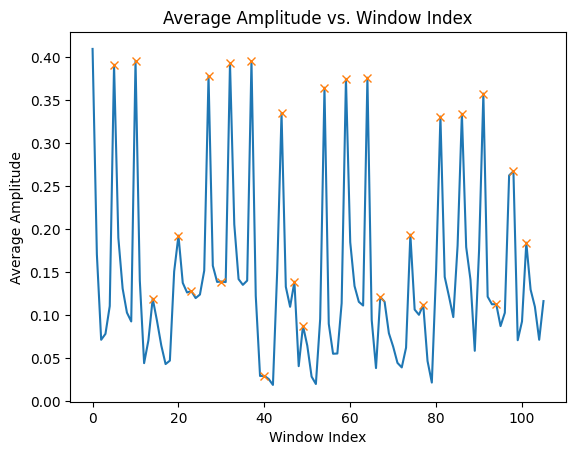

Local maxima locations: [  5  10  14  20  23  27  30  32  37  40  44  47  49  54  59  64  67  74
  77  81  86  91  94  98 101]


In [ ]:
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt


amplitude_values = avg_amplitudes


order = 1
maxima_idx = argrelextrema(np.array(amplitude_values), np.greater, order=order)[0]


plt.plot(amplitude_values)
plt.plot(maxima_idx, np.array(amplitude_values)[maxima_idx], "x")
plt.xlabel("Window Index")
plt.ylabel("Average Amplitude")
plt.title("Average Amplitude vs. Window Index")
plt.show()


print("Local maxima locations:", maxima_idx)


Include start of the window too

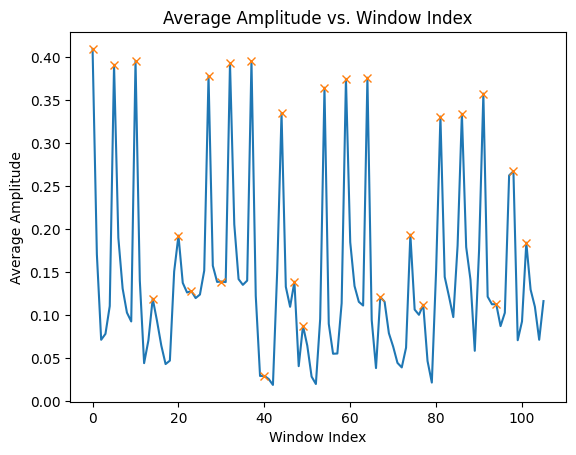

Local maxima locations: [  0   5  10  14  20  23  27  30  32  37  40  44  47  49  54  59  64  67
  74  77  81  86  91  94  98 101]


In [ ]:
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt


amplitude_values = avg_amplitudes


order = 1
maxima_idx = argrelextrema(np.array(amplitude_values), np.greater, order=order)[0]


if amplitude_values[0] >= amplitude_values[1]:
    maxima_idx = np.insert(maxima_idx, 0, 0)


plt.plot(amplitude_values)
plt.plot(maxima_idx, np.array(amplitude_values)[maxima_idx], "x")
plt.xlabel("Window Index")
plt.ylabel("Average Amplitude")
plt.title("Average Amplitude vs. Window Index")
plt.show()


print("Local maxima locations:", maxima_idx)


In [ ]:
print(len(maxima_idx))

26



Filtering out deepest troughs

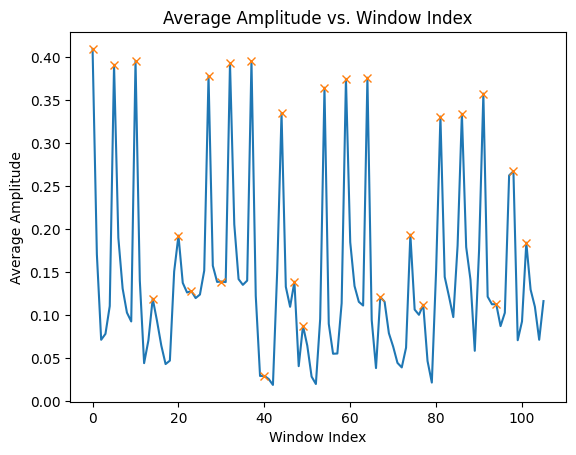

Filtered local maxima locations: [0, 5, 10, 14, 20, 23, 27, 30, 32, 37, 40, 44, 47, 49, 54, 59, 64, 67, 74, 77, 81, 86, 91, 94, 98, 101]


In [ ]:
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt


amplitude_values = avg_amplitudes


order = 1
maxima_idx = argrelextrema(np.array(amplitude_values), np.greater, order=order)[0]

# minimum peak amplitude
threshold = 0.004

# Filter out local maxima in troughs based on the threshold
filtered_maxima_idx = [i for i in maxima_idx if amplitude_values[i] > threshold]

# Include the first window's index if it is a local maximum
if len(amplitude_values) > 0 and amplitude_values[0] >= threshold:
    filtered_maxima_idx = [0] + filtered_maxima_idx

# Plot n mark the filtered local maxima
plt.plot(amplitude_values)
plt.plot(filtered_maxima_idx, np.array(amplitude_values)[filtered_maxima_idx], "x")
plt.xlabel("Window Index")
plt.ylabel("Average Amplitude")
plt.title("Average Amplitude vs. Window Index")
plt.show()


print("Filtered local maxima locations:", filtered_maxima_idx)


Now in this code I get indices of peak amplitudes. I have a list of pitch values with their indexes, just like the amplitude list. What I want to do is, search nearby, in the neighbourhood of these peak indices and output the max frequency in that area.

In [ ]:
# Define the neighborhood size
neighborhood_size = 3

#  Iterate over the filtered peak indices
max_freqs = []
for peak_idx in filtered_maxima_idx:
    # Initialize the neighborhood boundaries
    start_idx = peak_idx - neighborhood_size
    end_idx = peak_idx + neighborhood_size + 1

    #  edge cases
    if start_idx < 0:
        start_idx = 0
    if end_idx > len(pitch_values):
        end_idx = len(pitch_values)


    neighborhood_pitch = pitch_values[start_idx:end_idx]


    max_freq = np.max(neighborhood_pitch)


    max_freqs.append(max_freq)


print("Maximum Frequencies:", max_freqs)


Maximum Frequencies: [261.31711111111116, 347.23322222222225, 389.4687777777778, 389.4687777777778, 441.4707777777778, 452.34344444444446, 452.34344444444446, 439.598, 393.70744444444443, 681.0198888888889, 830.8561111111111, 830.8561111111111, 670.6863333333333, 416.1243333333333, 698.047, 369.7272222222222, 350.19100000000003, 350.19100000000003, 351.4477777777778, 350.3937777777778, 350.3937777777778, 351.76244444444444, 443.48033333333336, 443.48033333333336, 441.2842222222222, 394.12433333333337]


In [ ]:
print(len(max_freqs))

26


Convert Pitch values to Notes using Formula

In [ ]:
import math
def pitch_to_closest_note_name(pitch):
    # Calculate the MIDI note number
    midi_note = 12 * (math.log2(pitch) - math.log2(440)) + 69

    # closest note frequency and its MIDI note number
    closest_midi_note = round(midi_note)
    closest_frequency = 440 * 2 ** ((closest_midi_note - 69) / 12)

    #  octave and note name of the closest note
    octave = (closest_midi_note // 12) - 1
    note_name = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'][closest_midi_note % 12]


    return note_name + str(octave), closest_frequency

In [ ]:
pitch_to_closest_note_name(420)

('G#4', 415.3046975799451)

In [ ]:
my_list = []
for p in max_freqs:
  my_list.append(pitch_to_closest_note_name(p)[0])

In [ ]:
print(len(my_list))

26


In [ ]:
print(my_list)

['C4', 'F4', 'G4', 'G4', 'A4', 'A4', 'A4', 'A4', 'G4', 'F5', 'G#5', 'G#5', 'E5', 'G#4', 'F5', 'F#4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'A4', 'A4', 'A4', 'G4']


Or, alternatively, convert Pitch values to Notes using direct mappings stored in Dictionary

In [ ]:

notes ={
    16.35: 'C0', 17.32: 'C#0/Db0', 18.35: 'D0', 19.45: 'D#0/Eb0', 20.60: 'E0', 21.83: 'F0', 23.12: 'F#0/Gb0',
    24.50: 'G0', 25.96: 'G#0/Ab0', 27.50: 'A0', 29.14: 'A#0/Bb0', 30.87: 'B0', 32.70: 'C1', 34.65: 'C#1/Db1',
    36.71: 'D1', 38.89: 'D#1/Eb1', 41.20: 'E1', 43.65: 'F1', 46.25: 'F#1/Gb1', 49.00: 'G1', 51.91: 'G#1/Ab1',
    55.00: 'A1', 58.27: 'A#1/Bb1', 61.74: 'B1', 65.41: 'C2', 69.30: 'C#2/Db2', 73.42: 'D2', 77.78: 'D#2/Eb2',
    82.41: 'E2', 87.31: 'F2', 92.50: 'F#2/Gb2', 98.00: 'G2', 103.83: 'G#2/Ab2', 110.00: 'A2', 116.54: 'A#2/Bb2',
    123.47: 'B2', 130.81: 'C3', 138.59: 'C#3/Db3', 146.83: 'D3', 155.56: 'D#3/Eb3', 164.81: 'E3', 174.61: 'F3',
    185.00: 'F#3/Gb3', 196.00: 'G3', 207.65: 'G#3/Ab3', 220.00: 'A3', 233.08: 'A#3/Bb3', 246.94: 'B3', 261.63: 'C4',
    277.18: 'C#4/Db4', 293.66: 'D4', 311.13: 'D#4/Eb4', 329.63: 'E4', 349.23: 'F4', 369.99: 'F#4/Gb4', 392.00: 'G4',
    415.30: 'G#4/Ab4', 440.00: 'A4', 466.16: 'A#4/Bb4', 493.88: 'B4', 523.25: 'C5', 554.37: 'C#5/Db5', 587.33: 'D5',
    622.25: 'D#5/Eb5', 659.25: 'E5', 698.46: 'F5', 739.99: 'F#5/Gb5', 783.99: 'G5', 830.61: 'G#5/'}


notes_detected = []

for p in max_freqs:
    # Find closest pitch value in the mapping
    #print(p)
    closest_pitch = min(notes.keys(), key=lambda x:abs(x-p))


    note = notes[closest_pitch]


    notes_detected.append(note)


print(notes_detected)
print(len(notes_detected))

['C4', 'F4', 'G4', 'G4', 'A4', 'A4', 'A4', 'A4', 'G4', 'F5', 'G#5/', 'G#5/', 'E5', 'G#4/Ab4', 'F5', 'F#4/Gb4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'A4', 'A4', 'A4', 'G4']
26


Matching Using Edit Distance

In [ ]:
def levenshtein_distance(s1, s2):
    m = len(s1)
    n = len(s2)

    # Initialize matrix
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Initialize first row and column
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    # Fill in the rest of the matrix
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            dp[i][j] = min(
                dp[i - 1][j] + 1,  # Deletion
                dp[i][j - 1] + 1,  # Insertion
                dp[i - 1][j - 1] + cost,  # Substitution
            )

    return dp[m][n]

In [ ]:
def find_best_match(song_database, small_sequence):
    best_match = None
    min_distance = float('inf')

    for song_sequence in song_database:
        distance = min(levenshtein_distance(song_sequence[i:i+len(small_sequence)], small_sequence) for i in range(len(song_sequence) - len(small_sequence) + 1))
        if distance < min_distance:
            min_distance = distance
            best_match = song_sequence

    return best_match

In [ ]:
song_database = [
   ['F4', 'F4', 'F4', 'F4', 'C4', 'F4', 'F4', 'D4', 'C#4/Db4', 'D4', 'D4', 'A#3/Bb3', 'A4', 'A4', 'A4', 'A4', 'A4', 'D#4/Eb4', 'F4', 'F4', 'G4', 'G4', 'G4', 'F4', 'D4', 'C#4/Db4', 'F4', 'F4', 'F4', 'C4', 'C4', 'C4', 'C4', 'C4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F5', 'G#5/', 'G#5/', 'G#5/', 'D4', 'C4', 'A#4/Bb4', 'D5', 'G5', 'G5', 'G#5/', 'G5', 'E4', 'D#4/Eb4', 'D4', 'D4', 'D4', 'F4', 'F#4/Gb4', 'F4', 'F4', 'F4', 'F4', 'E4', 'C4', 'C#4/Db4', 'F4', 'F4', 'A4', 'A4', 'C4', 'C4', 'F4', 'G4', 'G4', 'G4', 'G4', 'D4', 'D4', 'D4', 'C4', 'C4', 'E4', 'E4', 'D#4/Eb4', 'D#4/Eb4', 'B3', 'A4', 'A4', 'A4', 'F4', 'D4', 'D4', 'A3', 'C3', 'D#4/Eb4', 'B4', 'C5', 'C5', 'C4', 'D5', 'D5', 'D5', 'D5', 'C4', 'C4', 'F4', 'F4', 'G3', 'A3', 'A4', 'C#5/Db5', 'C#5/Db5', 'D5', 'D5', 'A#4/Bb4', 'G#4/Ab4', 'G#4/Ab4', 'A4', 'A4', 'F#4/Gb4', 'D4', 'D4', 'C4', 'A3', 'C#5/Db5', 'D5', 'D5', 'C#5/Db5', 'C5', 'A4', 'G#4/Ab4', 'G4', 'G4', 'G4', 'G4', 'G4', 'F#4/Gb4', 'G4', 'G4', 'G4', 'G4', 'A4', 'A4', 'A4', 'A4', 'G4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'D#4/Eb4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'B4', 'B4', 'D5', 'D5', 'A4', 'A4', 'G4', 'F4', 'F4', 'F4', 'C4', 'C4', 'C4', 'C4', 'C4', 'B4', 'D5', 'D5', 'D5', 'D5', 'D5', 'C#5/Db5', 'C5', 'G4', 'A4', 'A4', 'G#4/Ab4', 'C#4/Db4', 'D4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'C#5/Db5', 'C#5/Db5', 'D5', 'D5', 'A#4/Bb4', 'G#4/Ab4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'A4', 'A4', 'A4'],
   ['D5', 'G#5/', 'G#5/', 'C5', 'F5', 'F5', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'G5', 'F5', 'F5', 'F5', 'B4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F#4/Gb4', 'A4', 'A4', 'A4', 'G4', 'F#4/Gb4', 'G4', 'F#4/Gb4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'G#4/Ab4', 'A4', 'A4', 'A4', 'A4', 'G4', 'G4', 'G4', 'F4', 'F4', 'F4', 'F#4/Gb4', 'G#4/Ab4', 'G#4/Ab4', 'F4', 'F4', 'F4', 'F4', 'F#4/Gb4', 'A4', 'A4', 'F#4/Gb4', 'F#4/Gb4', 'G4', 'A4', 'A4', 'A#4/Bb4', 'A#4/Bb4', 'A4', 'G4', 'E5', 'G#5/', 'G#5/', 'F5', 'F5', 'F5', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'G4', 'A4', 'A4', 'A4', 'G4', 'G4', 'G4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'A4', 'G4', 'F#4/Gb4', 'F4', 'F4', 'F4', 'G4', 'A4', 'A4', 'E4', 'F4', 'F4', 'G4', 'G4', 'F4', 'F4', 'F4', 'F#4/Gb4', 'G4', 'A#4/Bb4', 'A#4/Bb4', 'A4', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'B3', 'B3', 'B3', 'C#4/Db4', 'F4', 'F4', 'F4', 'F4', 'F4', 'G#4/Ab4', 'A4', 'F1', 'E4', 'F4', 'A4', 'E4', 'F4', 'F4', 'F4', 'F4', 'G4', 'A4', 'F4', 'F4', 'C#4/Db4', 'D1', 'G1', 'G1', 'E4', 'F4', 'G4', 'A#4/Bb4', 'C5', 'A#4/Bb4', 'A#4/Bb4', 'A#4/Bb4', 'G#4/Ab4', 'G4', 'F#2/Gb2', 'G#1/Ab1', 'G#1/Ab1', 'G#1/Ab1', 'G#1/Ab1', 'G1', 'G#1/Ab1', 'G#1/Ab1', 'A#1/Bb1', 'A#1/Bb1', 'A4', 'A4', 'A4', 'G#4/Ab4', 'G#4/Ab4', 'G4', 'B2', 'A#1/Bb1', 'A#1/Bb1', 'A#1/Bb1', 'A#1/Bb1', 'A#1/Bb1', 'D#2/Eb2', 'F3'],
   ['C#5/Db5', 'B4', 'F#5/Gb5', 'F#5/Gb5', 'G5', 'G5', 'G5', 'G5', 'D5', 'D5', 'G#5/', 'G#5/', 'E5', 'E5', 'E5', 'E5', 'D5', 'D5', 'F5', 'F#5/Gb5', 'G5', 'G5', 'G5', 'G5', 'F#5/Gb5', 'G#5/', 'G#5/', 'G#5/', 'E5', 'D#5/Eb5', 'E5', 'D#5/Eb5', 'C4', 'D4', 'D4', 'D4', 'D4', 'B3', 'F#4/Gb4', 'F#4/Gb4', 'G4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'B3', 'D#4/Eb4', 'F4', 'D4', 'A#3/Bb3', 'A#3/Bb3', 'D3', 'D4', 'E4', 'E4', 'E4', 'F4', 'F4', 'D4', 'E4', 'G4', 'G4', 'G4', 'G4', 'G4', 'F#4/Gb4', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'G4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'F#4/Gb4', 'F#4/Gb4', 'D4', 'E4', 'F#4/Gb4', 'C#4/Db4', 'C#4/Db4', 'A3', 'A3', 'C#4/Db4', 'D4', 'E4', 'E4', 'E4', 'D#4/Eb4', 'D#4/Eb4', 'E4', 'F#4/Gb4', 'F4', 'D4', 'D4', 'A4', 'A4', 'A4', 'E4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'F4', 'C#4/Db4', 'C#4/Db4', 'C4', 'D4', 'D4', 'D4', 'D4', 'C#4/Db4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'C5', 'C#5/Db5', 'C5', 'E4', 'E4', 'E4', 'E4', 'F#4/Gb4', 'A4', 'A4', 'B4', 'B4', 'B4', 'D#4/Eb4', 'A#3/Bb3', 'A4', 'A4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'A3', 'F4', 'G4', 'A4', 'A4', 'A4', 'G#4/Ab4', 'F4', 'E4', 'D4', 'D4', 'C#4/Db4', 'A4', 'A4', 'G#4/Ab4', 'G#4/Ab4', 'F#4/Gb4', 'F4', 'F#4/Gb4', 'E4', 'D4', 'F4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'E4', 'F#4/Gb4', 'A4', 'A4', 'A4', 'A4', 'B4', 'C#5/Db5', 'C#5/Db5', 'C5', 'C4', 'A4', 'A4', 'A4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'A4', 'A4', 'G4', 'G#4/Ab4', 'G#4/Ab4', 'F#4/Gb4', 'F#4/Gb4', 'D#4/Eb4', 'B3', 'G4', 'A4', 'A4', 'G4', 'G#4/Ab4', 'G#4/Ab4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'F4', 'F4'],
   ['C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'G#3/Ab3', 'F3', 'G#2/Ab2', 'G#1/Ab1', 'E3', 'C4', 'C4', 'C4', 'B3', 'C4', 'C4', 'C4', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'A#3/Bb3', 'C4', 'C4', 'C4', 'G#3/Ab3', 'G#3/Ab3', 'E3', 'C3', 'C#2/Db2', 'C#3/Db3', 'G#3/Ab3', 'A#3/Bb3', 'C4', 'C4', 'A#3/Bb3', 'D#2/Eb2', 'D#2/Eb2', 'F#2/Gb2', 'D#3/Eb3', 'D#3/Eb3', 'D#3/Eb3', 'F4', 'F4', 'F4', 'C4', 'C4', 'A#3/Bb3', 'G#3/Ab3', 'G#3/Ab3', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'B3', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'A#3/Bb3', 'C4', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'C4', 'C#4/Db4', 'D4', 'D4', 'A#3/Bb3', 'A#3/Bb3', 'C4', 'C4', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'B3', 'B3', 'D#4/Eb4', 'D#4/Eb4', 'F4', 'F4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'A#3/Bb3', 'C4', 'A#3/Bb3', 'C#4/Db4', 'C#4/Db4', 'C4', 'C4', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'C4', 'E3', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'C4', 'C#4/Db4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'B3', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'G#3/Ab3', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'A3', 'C4', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'C4', 'A3', 'G#3/Ab3', 'F3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'D4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'C4', 'C4', 'A#3/Bb3', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3'],
   ['C#5/Db5', 'G#3/Ab3', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'F#3/Gb3', 'G#3/Ab3', 'G#3/Ab3', 'G3', 'A3', 'G3', 'G3', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'G3', 'D5', 'D5', 'B4', 'B4', 'B4', 'F3', 'F3', 'F#3/Gb3', 'G#3/Ab3', 'D4', 'D5', 'D5', 'C5', 'B4', 'B4', 'B4', 'G4', 'A3', 'G3', 'C#4/Db4', 'D5', 'D5', 'D5', 'D5', 'B4', 'B4', 'G4', 'E4', 'D5', 'D5', 'D5', 'B4', 'B4', 'G#4/Ab4', 'G4', 'G4', 'E4', 'E4', 'D#4/Eb4', 'D#4/Eb4', 'D5', 'D5', 'D5', 'B4', 'B4', 'B4', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'A3', 'C#4/Db4', 'D4', 'D4', 'A4', 'A4', 'A#4/Bb4', 'B4', 'B4', 'C4', 'G#3/Ab3', 'D4', 'D4', 'B4', 'B4', 'B4', 'A#4/Bb4', 'F4', 'F4', 'E4', 'D#4/Eb4', 'D4', 'A#4/Bb4', 'C#5/Db5', 'C#5/Db5', 'B4', 'B4', 'B4', 'A4', 'G4', 'E4', 'E4', 'E4', 'A#4/Bb4', 'B4', 'B4', 'B4', 'A#4/Bb4', 'A4', 'A4', 'A4', 'E4', 'A4', 'A#4/Bb4', 'B4', 'B4', 'B4', 'A#4/Bb4', 'A4', 'A4', 'A#3/Bb3', 'G#4/Ab4', 'B4', 'B4', 'A4', 'G4', 'A4', 'A4', 'A4', 'G4', 'G4', 'A4', 'A4', 'B4', 'B4', 'B4', 'A4', 'A4', 'A#4/Bb4', 'B4', 'A#4/Bb4', 'A4', 'G4', 'G4', 'G#4/Ab4', 'A#4/Bb4', 'A#4/Bb4', 'A#4/Bb4', 'E4', 'G4', 'A4', 'A4', 'A4', 'G4', 'D#4/Eb4', 'B3', 'B3', 'A4', 'A4', 'B4', 'G4', 'G4', 'F4', 'E4', 'D4', 'D4', 'C#4/Db4', 'B3', 'G4', 'G4', 'G4', 'C#3/Db3', 'G4', 'G4', 'E4', 'D4', 'D4', 'C#4/Db4', 'C#4/Db4', 'A3', 'F3', 'G#1/Ab1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'D#2/Eb2', 'G4', 'F#4/Gb4', 'E4', 'D4', 'D4', 'B3', 'B3', 'D#4/Eb4', 'A4', 'A4', 'A4', 'G4', 'G4', 'G4', 'F#4/Gb4', 'E4', 'D#4/Eb4', 'C4', 'C4', 'C4', 'A#3/Bb3', 'G3', 'G3', 'E3', 'D#4/Eb4', 'G4', 'G4', 'G4', 'E4', 'D4', 'B3', 'B3', 'A#1/Bb1', 'G1', 'G1'],
   ['C#3/Db3', 'C#3/Db3', 'D3', 'F#3/Gb3', 'G#3/Ab3', 'G3', 'A3', 'A3', 'A3', 'A3', 'B2', 'B2', 'C#4/Db4', 'C#4/Db4', 'D3', 'F#3/Gb3', 'G3', 'G3', 'F#3/Gb3', 'A3', 'A3', 'A3', 'F3', 'B3', 'B3', 'B3', 'E3', 'E3', 'E3', 'E3', 'F#3/Gb3', 'F#3/Gb3', 'G3', 'A3', 'A3', 'A3', 'A3', 'A3', 'G#3/Ab3', 'B3', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'A3', 'A3', 'F#3/Gb3', 'F#3/Gb3', 'G3', 'G3', 'G#3/Ab3', 'A3', 'A3', 'A3', 'A3', 'F3', 'F#3/Gb3', 'B3', 'G#3/Ab3', 'G3', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'G#3/Ab3', 'G#3/Ab3', 'B3', 'C#4/Db4', 'G3', 'C#4/Db4', 'C#4/Db4', 'G#3/Ab3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'F#3/Gb3', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'F#3/Gb3', 'F#3/Gb3', 'G#3/Ab3', 'A3', 'A3', 'G#3/Ab3', 'G#3/Ab3', 'F#3/Gb3', 'F#3/Gb3', 'B3', 'A#3/Bb3', 'G#3/Ab3', 'F3', 'F#3/Gb3', 'A3', 'A3', 'A3', 'A3', 'A3', 'E3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C4', 'C4', 'G3', 'G3', 'F#3/Gb3', 'A3', 'A3', 'A3', 'C#4/Db4', 'E4', 'E4', 'D#4/Eb4', 'C#4/Db4', 'C#4/Db4', 'B3', 'B3', 'G#3/Ab3', 'C#4/Db4', 'D4', 'D4', 'A#3/Bb3', 'A#3/Bb3', 'G#3/Ab3', 'G#3/Ab3', 'C4', 'B3', 'C4', 'D3', 'C#3/Db3', 'C#3/Db3', 'F#3/Gb3', 'G#3/Ab3', 'E4', 'E4', 'E4', 'A3', 'A3', 'A#3/Bb3', 'A3', 'G#3/Ab3', 'G#3/Ab3', 'F#3/Gb3', 'F#3/Gb3', 'C#3/Db3', 'D#3/Eb3', 'G#3/Ab3', 'C#4/Db4', 'F#3/Gb3', 'A3', 'A3', 'A3', 'A3', 'G#3/Ab3', 'F#3/Gb3', 'E4', 'C4', 'G3', 'G3', 'B3', 'B3', 'F#3/Gb3', 'G#3/Ab3', 'A3', 'C4', 'D4', 'D4', 'A3', 'A3', 'F3', 'F3', 'C#3/Db3', 'D4', 'G3', 'F#3/Gb3', 'F#3/Gb3', 'F#3/Gb3', 'G#3/Ab3', 'G#3/Ab3'],
    ['C5', 'G#3/Ab3', 'F#4/Gb4', 'G#4/Ab4', 'G#4/Ab4', 'G#3/Ab3', 'G#3/Ab3', 'A#3/Bb3', 'D#5/Eb5', 'D#5/Eb5', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'G#3/Ab3', 'G#3/Ab3', 'A#3/Bb3', 'D#5/Eb5', 'D#5/Eb5', 'D#5/Eb5', 'A#3/Bb3', 'C4', 'C4', 'C4', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'C#4/Db4', 'C4', 'C4', 'C4', 'C4', 'C4', 'B3', 'D#4/Eb4', 'D#4/Eb4', 'A#3/Bb3', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'G4', 'G4', 'G#3/Ab3', 'C4', 'C4', 'C4', 'C4', 'C4', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'D#4/Eb4', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#2/Bb2', 'A#2/Bb2', 'A#2/Bb2', 'A#2/Bb2', 'A#2/Bb2', 'A#2/Bb2', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'A#2/Bb2', 'A#2/Bb2', 'A#3/Bb3', 'C4', 'C4', 'C4', 'A#3/Bb3', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'D4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'G#3/Ab3', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'B3', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'B3', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'G#3/Ab3', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'C4', 'A#3/Bb3', 'C#4/Db4', 'G#3/Ab3', 'A3', 'A#3/Bb3', 'B3', 'B3', 'D#4/Eb4', 'E4', 'E4', 'C#4/Db4', 'D4', 'D4', 'C4', 'F#4/Gb4', 'G4', 'A#3/Bb3', 'G#3/Ab3', 'A#3/Bb3', 'A#3/Bb3', 'B3', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'C4', 'C4', 'D#4/Eb4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'D#4/Eb4', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'D4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'B3', 'B3', 'C4', 'C4', 'C4', 'B3', 'B3', 'C#4/Db4', 'E4', 'E4', 'E4', 'E4', 'E4', 'C#4/Db4', 'C4', 'A#3/Bb3', 'G#3/Ab3', 'G#3/Ab3', 'A3', 'A#3/Bb3', 'C4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'F4', 'F4', 'F4', 'C#4/Db4', 'B3', 'A3', 'G#3/Ab3', 'A3', 'A#3/Bb3', 'A#3/Bb3', 'B3', 'G#3/Ab3', 'G#3/Ab3', 'B3', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'C4', 'C4', 'G#3/Ab3', 'G#3/Ab3', 'D4', 'D4', 'D4', 'B3', 'C4', 'C4', 'C4', 'C#4/Db4', 'D#4/Eb4', 'D#4/Eb4', 'E4', 'D#4/Eb4', 'C4', 'C4', 'C4', 'C4', 'B3', 'B3', 'C#4/Db4'],
    ['E4', 'E4', 'E4', 'F#3/Gb3', 'F#3/Gb3', 'F#3/Gb3', 'E3', 'E3', 'E3', 'E3', 'E3', 'B2', 'B2', 'B2', 'B2', 'F3', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'F4', 'F4', 'B4', 'B4', 'B4', 'B4', 'B4', 'C4', 'B3', 'B3', 'C#4/Db4', 'E4', 'E4', 'E4', 'D#4/Eb4', 'D4', 'F#4/Gb4', 'E4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'D#4/Eb4', 'E4', 'E4', 'D#4/Eb4', 'D#4/Eb4', 'E4', 'E4', 'D#4/Eb4', 'A#3/Bb3', 'F4', 'A4', 'A4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'E4', 'E4', 'E4', 'E4', 'D#4/Eb4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'B3', 'B3', 'B3', 'B3', 'B3', 'B3', 'C#4/Db4', 'D4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'D#4/Eb4', 'D#4/Eb4', 'E4', 'E4', 'E4', 'E4', 'E4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'F#4/Gb4', 'F#4/Gb4', 'G#4/Ab4', 'G#4/Ab4', 'A4', 'A4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'B3', 'B3', 'B3', 'B3', 'B3', 'B3', 'B3', 'D#4/Eb4', 'A3', 'B3', 'B3', 'E4', 'E4', 'E4', 'E4', 'D3', 'C4', 'C4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'C#4/Db4', 'A#4/Bb4', 'B4', 'B4', 'B4', 'G#4/Ab4']
]

small_sequence = ['C4', 'F4', 'G4', 'G4', 'A4', 'A4', 'A4', 'A4', 'G4', 'F5', 'G#5/', 'G#5/', 'E5', 'G#4/Ab4', 'F5', 'F#4/Gb4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'A4', 'A4', 'A4', 'G4']



best_match = find_best_match(song_database, small_sequence)

song_mapping = {
      tuple(['F4', 'F4', 'F4', 'F4', 'C4', 'F4', 'F4', 'D4', 'C#4/Db4', 'D4', 'D4', 'A#3/Bb3', 'A4', 'A4', 'A4', 'A4', 'A4', 'D#4/Eb4', 'F4', 'F4', 'G4', 'G4', 'G4', 'F4', 'D4', 'C#4/Db4', 'F4', 'F4', 'F4', 'C4', 'C4', 'C4', 'C4', 'C4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F5', 'G#5/', 'G#5/', 'G#5/', 'D4', 'C4', 'A#4/Bb4', 'D5', 'G5', 'G5', 'G#5/', 'G5', 'E4', 'D#4/Eb4', 'D4', 'D4', 'D4', 'F4', 'F#4/Gb4', 'F4', 'F4', 'F4', 'F4', 'E4', 'C4', 'C#4/Db4', 'F4', 'F4', 'A4', 'A4', 'C4', 'C4', 'F4', 'G4', 'G4', 'G4', 'G4', 'D4', 'D4', 'D4', 'C4', 'C4', 'E4', 'E4', 'D#4/Eb4', 'D#4/Eb4', 'B3', 'A4', 'A4', 'A4', 'F4', 'D4', 'D4', 'A3', 'C3', 'D#4/Eb4', 'B4', 'C5', 'C5', 'C4', 'D5', 'D5', 'D5', 'D5', 'C4', 'C4', 'F4', 'F4', 'G3', 'A3', 'A4', 'C#5/Db5', 'C#5/Db5', 'D5', 'D5', 'A#4/Bb4', 'G#4/Ab4', 'G#4/Ab4', 'A4', 'A4', 'F#4/Gb4', 'D4', 'D4', 'C4', 'A3', 'C#5/Db5', 'D5', 'D5', 'C#5/Db5', 'C5', 'A4', 'G#4/Ab4', 'G4', 'G4', 'G4', 'G4', 'G4', 'F#4/Gb4', 'G4', 'G4', 'G4', 'G4', 'A4', 'A4', 'A4', 'A4', 'G4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'D#4/Eb4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'B4', 'B4', 'D5', 'D5', 'A4', 'A4', 'G4', 'F4', 'F4', 'F4', 'C4', 'C4', 'C4', 'C4', 'C4', 'B4', 'D5', 'D5', 'D5', 'D5', 'D5', 'C#5/Db5', 'C5', 'G4', 'A4', 'A4', 'G#4/Ab4', 'C#4/Db4', 'D4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'C#5/Db5', 'C#5/Db5', 'D5', 'D5', 'A#4/Bb4', 'G#4/Ab4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'A4', 'A4', 'A4']) : 'Ajib Dastan Hai Ye',
      tuple(['D5', 'G#5/', 'G#5/', 'C5', 'F5', 'F5', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'G5', 'F5', 'F5', 'F5', 'B4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F#4/Gb4', 'A4', 'A4', 'A4', 'G4', 'F#4/Gb4', 'G4', 'F#4/Gb4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'G#4/Ab4', 'A4', 'A4', 'A4', 'A4', 'G4', 'G4', 'G4', 'F4', 'F4', 'F4', 'F#4/Gb4', 'G#4/Ab4', 'G#4/Ab4', 'F4', 'F4', 'F4', 'F4', 'F#4/Gb4', 'A4', 'A4', 'F#4/Gb4', 'F#4/Gb4', 'G4', 'A4', 'A4', 'A#4/Bb4', 'A#4/Bb4', 'A4', 'G4', 'E5', 'G#5/', 'G#5/', 'F5', 'F5', 'F5', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'G4', 'A4', 'A4', 'A4', 'G4', 'G4', 'G4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'A4', 'G4', 'F#4/Gb4', 'F4', 'F4', 'F4', 'G4', 'A4', 'A4', 'E4', 'F4', 'F4', 'G4', 'G4', 'F4', 'F4', 'F4', 'F#4/Gb4', 'G4', 'A#4/Bb4', 'A#4/Bb4', 'A4', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'B3', 'B3', 'B3', 'C#4/Db4', 'F4', 'F4', 'F4', 'F4', 'F4', 'G#4/Ab4', 'A4', 'F1', 'E4', 'F4', 'A4', 'E4', 'F4', 'F4', 'F4', 'F4', 'G4', 'A4', 'F4', 'F4', 'C#4/Db4', 'D1', 'G1', 'G1', 'E4', 'F4', 'G4', 'A#4/Bb4', 'C5', 'A#4/Bb4', 'A#4/Bb4', 'A#4/Bb4', 'G#4/Ab4', 'G4', 'F#2/Gb2', 'G#1/Ab1', 'G#1/Ab1', 'G#1/Ab1', 'G#1/Ab1', 'G1', 'G#1/Ab1', 'G#1/Ab1', 'A#1/Bb1', 'A#1/Bb1', 'A4', 'A4', 'A4', 'G#4/Ab4', 'G#4/Ab4', 'G4', 'B2', 'A#1/Bb1', 'A#1/Bb1', 'A#1/Bb1', 'A#1/Bb1', 'A#1/Bb1', 'D#2/Eb2', 'F3']) : 'Blank Space',
      tuple( ['C#5/Db5', 'B4', 'F#5/Gb5', 'F#5/Gb5', 'G5', 'G5', 'G5', 'G5', 'D5', 'D5', 'G#5/', 'G#5/', 'E5', 'E5', 'E5', 'E5', 'D5', 'D5', 'F5', 'F#5/Gb5', 'G5', 'G5', 'G5', 'G5', 'F#5/Gb5', 'G#5/', 'G#5/', 'G#5/', 'E5', 'D#5/Eb5', 'E5', 'D#5/Eb5', 'C4', 'D4', 'D4', 'D4', 'D4', 'B3', 'F#4/Gb4', 'F#4/Gb4', 'G4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'B3', 'D#4/Eb4', 'F4', 'D4', 'A#3/Bb3', 'A#3/Bb3', 'D3', 'D4', 'E4', 'E4', 'E4', 'F4', 'F4', 'D4', 'E4', 'G4', 'G4', 'G4', 'G4', 'G4', 'F#4/Gb4', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'G4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'F#4/Gb4', 'F#4/Gb4', 'D4', 'E4', 'F#4/Gb4', 'C#4/Db4', 'C#4/Db4', 'A3', 'A3', 'C#4/Db4', 'D4', 'E4', 'E4', 'E4', 'D#4/Eb4', 'D#4/Eb4', 'E4', 'F#4/Gb4', 'F4', 'D4', 'D4', 'A4', 'A4', 'A4', 'E4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'F4', 'C#4/Db4', 'C#4/Db4', 'C4', 'D4', 'D4', 'D4', 'D4', 'C#4/Db4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'C5', 'C#5/Db5', 'C5', 'E4', 'E4', 'E4', 'E4', 'F#4/Gb4', 'A4', 'A4', 'B4', 'B4', 'B4', 'D#4/Eb4', 'A#3/Bb3', 'A4', 'A4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'A3', 'F4', 'G4', 'A4', 'A4', 'A4', 'G#4/Ab4', 'F4', 'E4', 'D4', 'D4', 'C#4/Db4', 'A4', 'A4', 'G#4/Ab4', 'G#4/Ab4', 'F#4/Gb4', 'F4', 'F#4/Gb4', 'E4', 'D4', 'F4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'E4', 'F#4/Gb4', 'A4', 'A4', 'A4', 'A4', 'B4', 'C#5/Db5', 'C#5/Db5', 'C5', 'C4', 'A4', 'A4', 'A4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'A4', 'A4', 'G4', 'G#4/Ab4', 'G#4/Ab4', 'F#4/Gb4', 'F#4/Gb4', 'D#4/Eb4', 'B3', 'G4', 'A4', 'A4', 'G4', 'G#4/Ab4', 'G#4/Ab4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'F4', 'F4']) : 'Every thing I need',
      tuple(['C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'G#3/Ab3', 'F3', 'G#2/Ab2', 'G#1/Ab1', 'E3', 'C4', 'C4', 'C4', 'B3', 'C4', 'C4', 'C4', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'A#3/Bb3', 'C4', 'C4', 'C4', 'G#3/Ab3', 'G#3/Ab3', 'E3', 'C3', 'C#2/Db2', 'C#3/Db3', 'G#3/Ab3', 'A#3/Bb3', 'C4', 'C4', 'A#3/Bb3', 'D#2/Eb2', 'D#2/Eb2', 'F#2/Gb2', 'D#3/Eb3', 'D#3/Eb3', 'D#3/Eb3', 'F4', 'F4', 'F4', 'C4', 'C4', 'A#3/Bb3', 'G#3/Ab3', 'G#3/Ab3', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'B3', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'A#3/Bb3', 'C4', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'C4', 'C#4/Db4', 'D4', 'D4', 'A#3/Bb3', 'A#3/Bb3', 'C4', 'C4', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'B3', 'B3', 'D#4/Eb4', 'D#4/Eb4', 'F4', 'F4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'A#3/Bb3', 'C4', 'A#3/Bb3', 'C#4/Db4', 'C#4/Db4', 'C4', 'C4', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'C4', 'E3', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'C4', 'C#4/Db4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'B3', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'G#3/Ab3', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'A3', 'C4', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'C4', 'A3', 'G#3/Ab3', 'F3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'D4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'C4', 'C4', 'A#3/Bb3', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3']) : 'Perfect',
      tuple(['C#5/Db5', 'G#3/Ab3', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'F#3/Gb3', 'G#3/Ab3', 'G#3/Ab3', 'G3', 'A3', 'G3', 'G3', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'G3', 'D5', 'D5', 'B4', 'B4', 'B4', 'F3', 'F3', 'F#3/Gb3', 'G#3/Ab3', 'D4', 'D5', 'D5', 'C5', 'B4', 'B4', 'B4', 'G4', 'A3', 'G3', 'C#4/Db4', 'D5', 'D5', 'D5', 'D5', 'B4', 'B4', 'G4', 'E4', 'D5', 'D5', 'D5', 'B4', 'B4', 'G#4/Ab4', 'G4', 'G4', 'E4', 'E4', 'D#4/Eb4', 'D#4/Eb4', 'D5', 'D5', 'D5', 'B4', 'B4', 'B4', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'A3', 'C#4/Db4', 'D4', 'D4', 'A4', 'A4', 'A#4/Bb4', 'B4', 'B4', 'C4', 'G#3/Ab3', 'D4', 'D4', 'B4', 'B4', 'B4', 'A#4/Bb4', 'F4', 'F4', 'E4', 'D#4/Eb4', 'D4', 'A#4/Bb4', 'C#5/Db5', 'C#5/Db5', 'B4', 'B4', 'B4', 'A4', 'G4', 'E4', 'E4', 'E4', 'A#4/Bb4', 'B4', 'B4', 'B4', 'A#4/Bb4', 'A4', 'A4', 'A4', 'E4', 'A4', 'A#4/Bb4', 'B4', 'B4', 'B4', 'A#4/Bb4', 'A4', 'A4', 'A#3/Bb3', 'G#4/Ab4', 'B4', 'B4', 'A4', 'G4', 'A4', 'A4', 'A4', 'G4', 'G4', 'A4', 'A4', 'B4', 'B4', 'B4', 'A4', 'A4', 'A#4/Bb4', 'B4', 'A#4/Bb4', 'A4', 'G4', 'G4', 'G#4/Ab4', 'A#4/Bb4', 'A#4/Bb4', 'A#4/Bb4', 'E4', 'G4', 'A4', 'A4', 'A4', 'G4', 'D#4/Eb4', 'B3', 'B3', 'A4', 'A4', 'B4', 'G4', 'G4', 'F4', 'E4', 'D4', 'D4', 'C#4/Db4', 'B3', 'G4', 'G4', 'G4', 'C#3/Db3', 'G4', 'G4', 'E4', 'D4', 'D4', 'C#4/Db4', 'C#4/Db4', 'A3', 'F3', 'G#1/Ab1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'D#2/Eb2', 'G4', 'F#4/Gb4', 'E4', 'D4', 'D4', 'B3', 'B3', 'D#4/Eb4', 'A4', 'A4', 'A4', 'G4', 'G4', 'G4', 'F#4/Gb4', 'E4', 'D#4/Eb4', 'C4', 'C4', 'C4', 'A#3/Bb3', 'G3', 'G3', 'E3', 'D#4/Eb4', 'G4', 'G4', 'G4', 'E4', 'D4', 'B3', 'B3', 'A#1/Bb1', 'G1', 'G1']) : 'Shake It Off',
      tuple( ['C#3/Db3', 'C#3/Db3', 'D3', 'F#3/Gb3', 'G#3/Ab3', 'G3', 'A3', 'A3', 'A3', 'A3', 'B2', 'B2', 'C#4/Db4', 'C#4/Db4', 'D3', 'F#3/Gb3', 'G3', 'G3', 'F#3/Gb3', 'A3', 'A3', 'A3', 'F3', 'B3', 'B3', 'B3', 'E3', 'E3', 'E3', 'E3', 'F#3/Gb3', 'F#3/Gb3', 'G3', 'A3', 'A3', 'A3', 'A3', 'A3', 'G#3/Ab3', 'B3', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'A3', 'A3', 'F#3/Gb3', 'F#3/Gb3', 'G3', 'G3', 'G#3/Ab3', 'A3', 'A3', 'A3', 'A3', 'F3', 'F#3/Gb3', 'B3', 'G#3/Ab3', 'G3', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'G#3/Ab3', 'G#3/Ab3', 'B3', 'C#4/Db4', 'G3', 'C#4/Db4', 'C#4/Db4', 'G#3/Ab3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'F#3/Gb3', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'F#3/Gb3', 'F#3/Gb3', 'G#3/Ab3', 'A3', 'A3', 'G#3/Ab3', 'G#3/Ab3', 'F#3/Gb3', 'F#3/Gb3', 'B3', 'A#3/Bb3', 'G#3/Ab3', 'F3', 'F#3/Gb3', 'A3', 'A3', 'A3', 'A3', 'A3', 'E3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C4', 'C4', 'G3', 'G3', 'F#3/Gb3', 'A3', 'A3', 'A3', 'C#4/Db4', 'E4', 'E4', 'D#4/Eb4', 'C#4/Db4', 'C#4/Db4', 'B3', 'B3', 'G#3/Ab3', 'C#4/Db4', 'D4', 'D4', 'A#3/Bb3', 'A#3/Bb3', 'G#3/Ab3', 'G#3/Ab3', 'C4', 'B3', 'C4', 'D3', 'C#3/Db3', 'C#3/Db3', 'F#3/Gb3', 'G#3/Ab3', 'E4', 'E4', 'E4', 'A3', 'A3', 'A#3/Bb3', 'A3', 'G#3/Ab3', 'G#3/Ab3', 'F#3/Gb3', 'F#3/Gb3', 'C#3/Db3', 'D#3/Eb3', 'G#3/Ab3', 'C#4/Db4', 'F#3/Gb3', 'A3', 'A3', 'A3', 'A3', 'G#3/Ab3', 'F#3/Gb3', 'E4', 'C4', 'G3', 'G3', 'B3', 'B3', 'F#3/Gb3', 'G#3/Ab3', 'A3', 'C4', 'D4', 'D4', 'A3', 'A3', 'F3', 'F3', 'C#3/Db3', 'D4', 'G3', 'F#3/Gb3', 'F#3/Gb3', 'F#3/Gb3', 'G#3/Ab3', 'G#3/Ab3']) : 'Shape Of You',
      tuple(['C5', 'G#3/Ab3', 'F#4/Gb4', 'G#4/Ab4', 'G#4/Ab4', 'G#3/Ab3', 'G#3/Ab3', 'A#3/Bb3', 'D#5/Eb5', 'D#5/Eb5', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'G#3/Ab3', 'G#3/Ab3', 'A#3/Bb3', 'D#5/Eb5', 'D#5/Eb5', 'D#5/Eb5', 'A#3/Bb3', 'C4', 'C4', 'C4', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'C#4/Db4', 'C4', 'C4', 'C4', 'C4', 'C4', 'B3', 'D#4/Eb4', 'D#4/Eb4', 'A#3/Bb3', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'G4', 'G4', 'G#3/Ab3', 'C4', 'C4', 'C4', 'C4', 'C4', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'D#4/Eb4', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#2/Bb2', 'A#2/Bb2', 'A#2/Bb2', 'A#2/Bb2', 'A#2/Bb2', 'A#2/Bb2', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'A#2/Bb2', 'A#2/Bb2', 'A#3/Bb3', 'C4', 'C4', 'C4', 'A#3/Bb3', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'D4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'G#3/Ab3', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'A#3/Bb3', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'B3', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'B3', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'G#3/Ab3', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'C4', 'A#3/Bb3', 'C#4/Db4', 'G#3/Ab3', 'A3', 'A#3/Bb3', 'B3', 'B3', 'D#4/Eb4', 'E4', 'E4', 'C#4/Db4', 'D4', 'D4', 'C4', 'F#4/Gb4', 'G4', 'A#3/Bb3', 'G#3/Ab3', 'A#3/Bb3', 'A#3/Bb3', 'B3', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'C4', 'C4', 'D#4/Eb4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'D#4/Eb4', 'C4', 'D#4/Eb4', 'D#4/Eb4', 'D4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'D#4/Eb4', 'B3', 'B3', 'C4', 'C4', 'C4', 'B3', 'B3', 'C#4/Db4', 'E4', 'E4', 'E4', 'E4', 'E4', 'C#4/Db4', 'C4', 'A#3/Bb3', 'G#3/Ab3', 'G#3/Ab3', 'A3', 'A#3/Bb3', 'C4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'F4', 'F4', 'F4', 'C#4/Db4', 'B3', 'A3', 'G#3/Ab3', 'A3', 'A#3/Bb3', 'A#3/Bb3', 'B3', 'G#3/Ab3', 'G#3/Ab3', 'B3', 'C#4/Db4', 'C#4/Db4', 'C#4/Db4', 'C4', 'C4', 'G#3/Ab3', 'G#3/Ab3', 'D4', 'D4', 'D4', 'B3', 'C4', 'C4', 'C4', 'C#4/Db4', 'D#4/Eb4', 'D#4/Eb4', 'E4', 'D#4/Eb4', 'C4', 'C4', 'C4', 'C4', 'B3', 'B3', 'C#4/Db4']) : 'Night Changes',
      tuple(['E4', 'E4', 'E4', 'F#3/Gb3', 'F#3/Gb3', 'F#3/Gb3', 'E3', 'E3', 'E3', 'E3', 'E3', 'B2', 'B2', 'B2', 'B2', 'F3', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'G#4/Ab4', 'F4', 'F4', 'B4', 'B4', 'B4', 'B4', 'B4', 'C4', 'B3', 'B3', 'C#4/Db4', 'E4', 'E4', 'E4', 'D#4/Eb4', 'D4', 'F#4/Gb4', 'E4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'D#4/Eb4', 'E4', 'E4', 'D#4/Eb4', 'D#4/Eb4', 'E4', 'E4', 'D#4/Eb4', 'A#3/Bb3', 'F4', 'A4', 'A4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'E4', 'E4', 'E4', 'E4', 'D#4/Eb4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'B3', 'B3', 'B3', 'B3', 'B3', 'B3', 'C#4/Db4', 'D4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'D#4/Eb4', 'D#4/Eb4', 'E4', 'E4', 'E4', 'E4', 'E4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'F#4/Gb4', 'F#4/Gb4', 'G#4/Ab4', 'G#4/Ab4', 'A4', 'A4', 'F#4/Gb4', 'F#4/Gb4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'B3', 'B3', 'B3', 'B3', 'B3', 'B3', 'B3', 'D#4/Eb4', 'A3', 'B3', 'B3', 'E4', 'E4', 'E4', 'E4', 'D3', 'C4', 'C4', 'F#4/Gb4', 'F#4/Gb4', 'F#4/Gb4', 'C#4/Db4', 'A#4/Bb4', 'B4', 'B4', 'B4', 'G#4/Ab4']) : 'My Heart Will Go On'
}

if best_match:
    print("The best match is:", song_mapping[tuple(best_match)])
else:
    print("No match found.")


The best match is: Blank Space


My Heart Will Go on Violin Snippet

['E4', 'F#4/Gb4', 'F#4/Gb4', 'G4', 'G#4/Ab4', 'G#4/Ab4', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'G#4/Ab4', 'G4', 'G4', 'G4', 'E4', 'E4', 'E4', 'E4', 'E4', 'A#3/Bb3', 'B3', 'B3', 'D#4/Eb4', 'D#4/Eb4', 'E4', 'E4', 'E4', 'F#4/Gb4', 'F#4/Gb4', 'F4', 'F4', 'F#4/Gb4', 'F#4/Gb4', 'G#4/Ab4', 'E5', 'E5', 'C#5/Db5', 'E5', 'E5', 'E5', 'E5', 'E5', 'F4', 'E5', 'E5', 'D#5/Eb5', 'E5', 'E5', 'D5', 'E5', 'E4', 'B3', 'F#5/Gb5', 'G#5/', 'G#5/', 'G#5/', 'F#5/Gb5', 'F#5/Gb5', 'B3', 'F#3/Gb3', 'A4', 'E5', 'E5', 'E5', 'E5', 'E5', 'E5', 'E5', 'G4', 'E5', 'E5', 'E4', 'B4', 'B4', 'B4', 'B4', 'B4', 'B4', 'G#4/Ab4', 'B3', 'D4', 'D4', 'B3']